In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
df=pd.read_csv("/content/drive/MyDrive/Manohar_Projects/DiabetesPrediction/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [111]:
df[["Pregnancies","Glucose","BloodPressure",'SkinThickness',"Insulin",'BMI']]=df[["Pregnancies","Glucose","BloodPressure",'SkinThickness',"Insulin",'BMI']].replace(0,np.nan)

In [112]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [114]:
df.dropna(axis=0,inplace=True)

In [115]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [116]:
df.duplicated().sum()

0

In [117]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,3.851190,122.279762,70.244048,28.663690,155.348214,32.297321,0.518702,31.836310,0.330357
std,3.148352,30.784649,12.363401,10.249863,118.777281,6.368558,0.327689,10.458446,0.471043
min,1.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,27.800000,0.268000,24.000000,0.000000
50%,3.000000,119.000000,70.000000,28.500000,125.500000,32.750000,0.446500,28.000000,0.000000
75%,6.000000,144.000000,78.000000,36.000000,190.000000,36.250000,0.688250,38.000000,1.000000
max,17.000000,197.000000,110.000000,52.000000,846.000000,57.300000,2.329000,81.000000,1.000000


Outcome
0    225
1    111
Name: count, dtype: int64


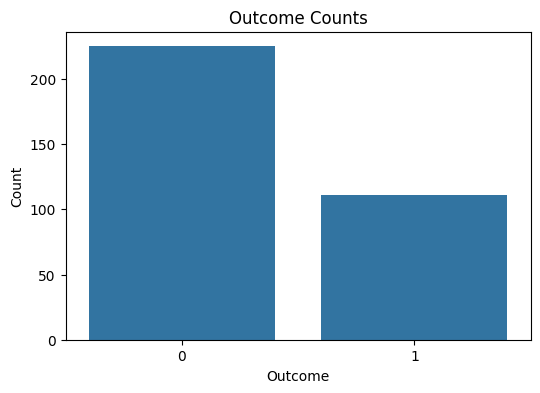

In [118]:
# prompt: generate me the code  to count outcome

# Count the occurrences of each outcome in the 'Outcome' column
outcome_counts = df['Outcome'].value_counts()

# Print the counts
print(outcome_counts)

# You can also visualize the counts using a bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Counts')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

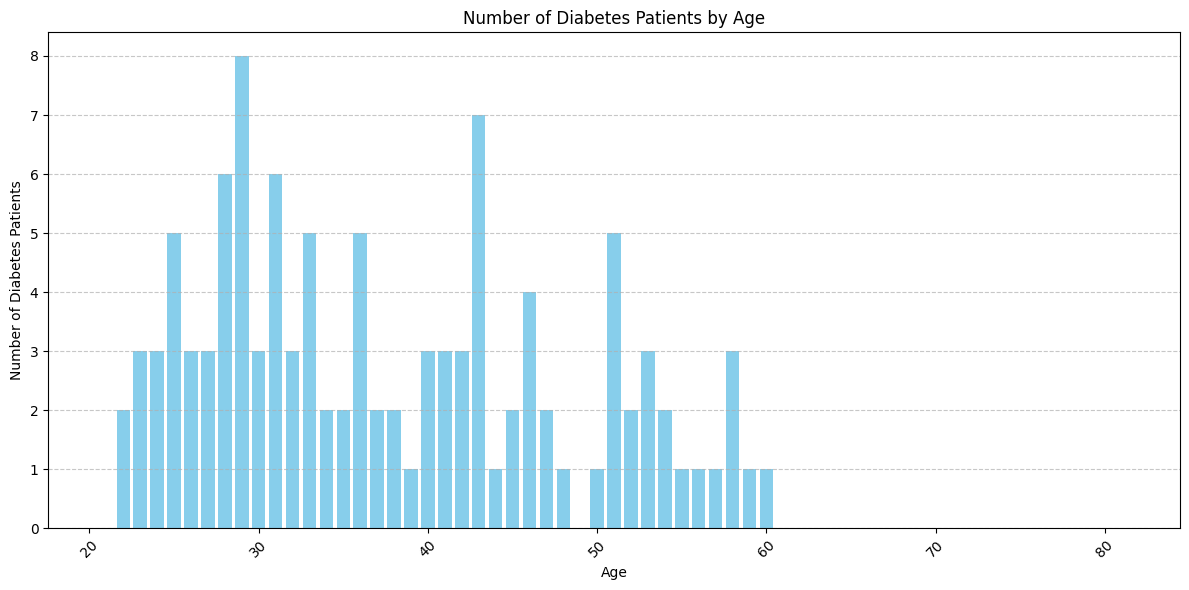

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
age = []
diabetes_patient = []
diabetes_and_age = {'age': age, 'diabetes_patient': diabetes_patient}

for i in df['Age'].unique():
    diabetes_patient.append(df[df['Age'] == i]['Outcome'].sum())
    age.append(i)

# Create a DataFrame
diabetes_and_age = pd.DataFrame(diabetes_and_age)

# Sort values by the number of diabetes patients
diabetes_and_age.sort_values(by=['diabetes_patient'], inplace=True)

# Visualize the data using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(diabetes_and_age['age'], diabetes_and_age['diabetes_patient'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Diabetes Patients')
plt.title('Number of Diabetes Patients by Age')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [120]:
df['Pregnancies']

,Pregnancies
3,1.0
6,3.0
8,2.0
13,1.0
14,5.0
...,...
751,1.0
755,1.0
760,2.0
763,10.0


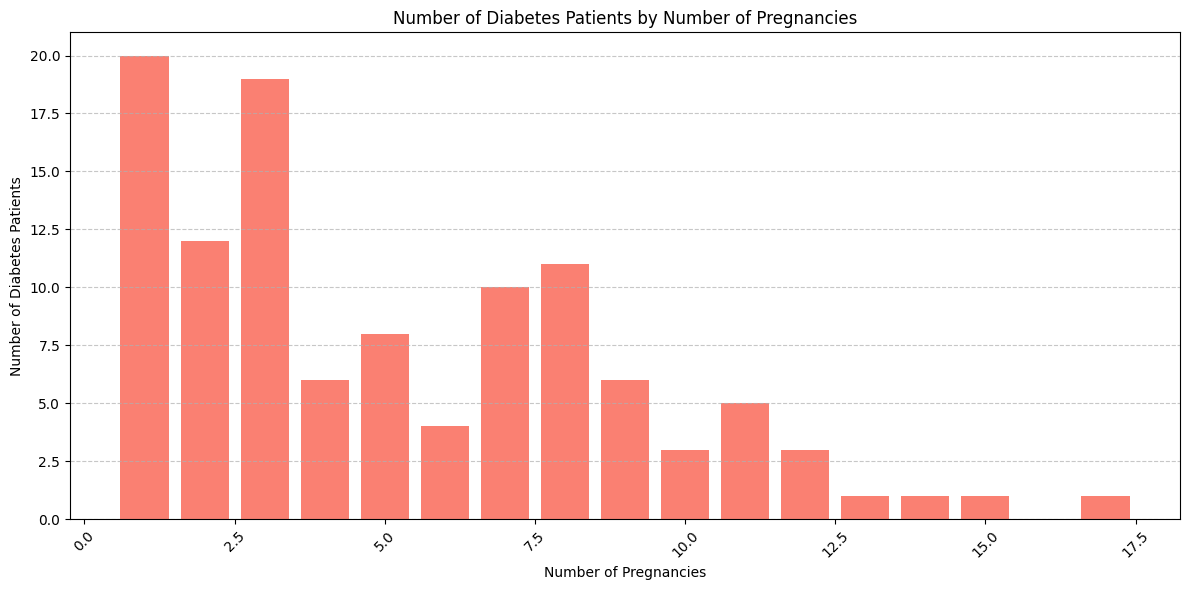

In [121]:
Pregnancies = []
diabetes_patient = []
diabetes_and_pregnancies = {'pregnancies': Pregnancies, 'diabetes_patient': diabetes_patient}

for i in df['Pregnancies'].unique():
    diabetes_patient.append(df[df['Pregnancies'] == i]['Outcome'].sum())
    Pregnancies.append(i)

# Create a DataFrame
diabetes_and_pregnancies = pd.DataFrame(diabetes_and_pregnancies)

# Sort values by the number of diabetes patients
diabetes_and_pregnancies.sort_values(by=['diabetes_patient'], inplace=True)

# Visualize the data using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(diabetes_and_pregnancies['pregnancies'], diabetes_and_pregnancies['diabetes_patient'], color='salmon')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Number of Diabetes Patients')
plt.title('Number of Diabetes Patients by Number of Pregnancies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

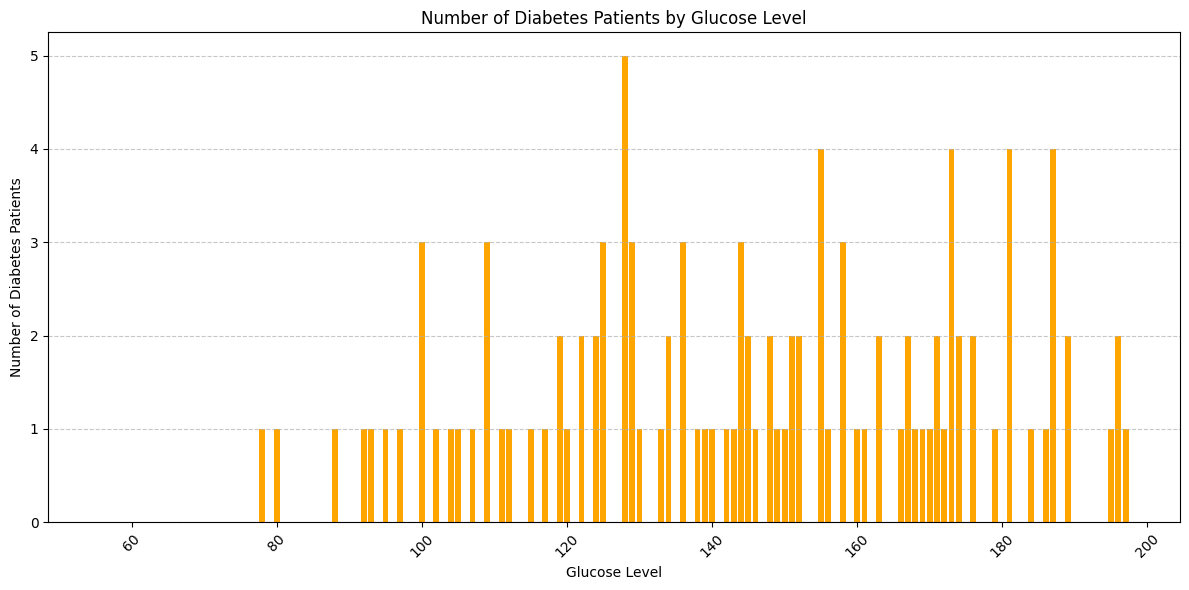

In [122]:
glucose = []
daibetes_patient = []
glucose_and_diabetes = {'Glucose': glucose, 'daibetes_patients': daibetes_patient}

for i in df['Glucose'].unique():
    daibetes_patient.append(df[df['Glucose'] == i]['Outcome'].sum())
    glucose.append(i)

# Create a DataFrame
glucose_and_diabetes = pd.DataFrame(glucose_and_diabetes)

# Sort values by the number of diabetes patients
glucose_and_diabetes.sort_values(by=['daibetes_patients'], inplace=True)

# Visualize the data using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(glucose_and_diabetes['Glucose'], glucose_and_diabetes['daibetes_patients'], color='orange')
plt.xlabel('Glucose Level')
plt.ylabel('Number of Diabetes Patients')
plt.title('Number of Diabetes Patients by Glucose Level')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

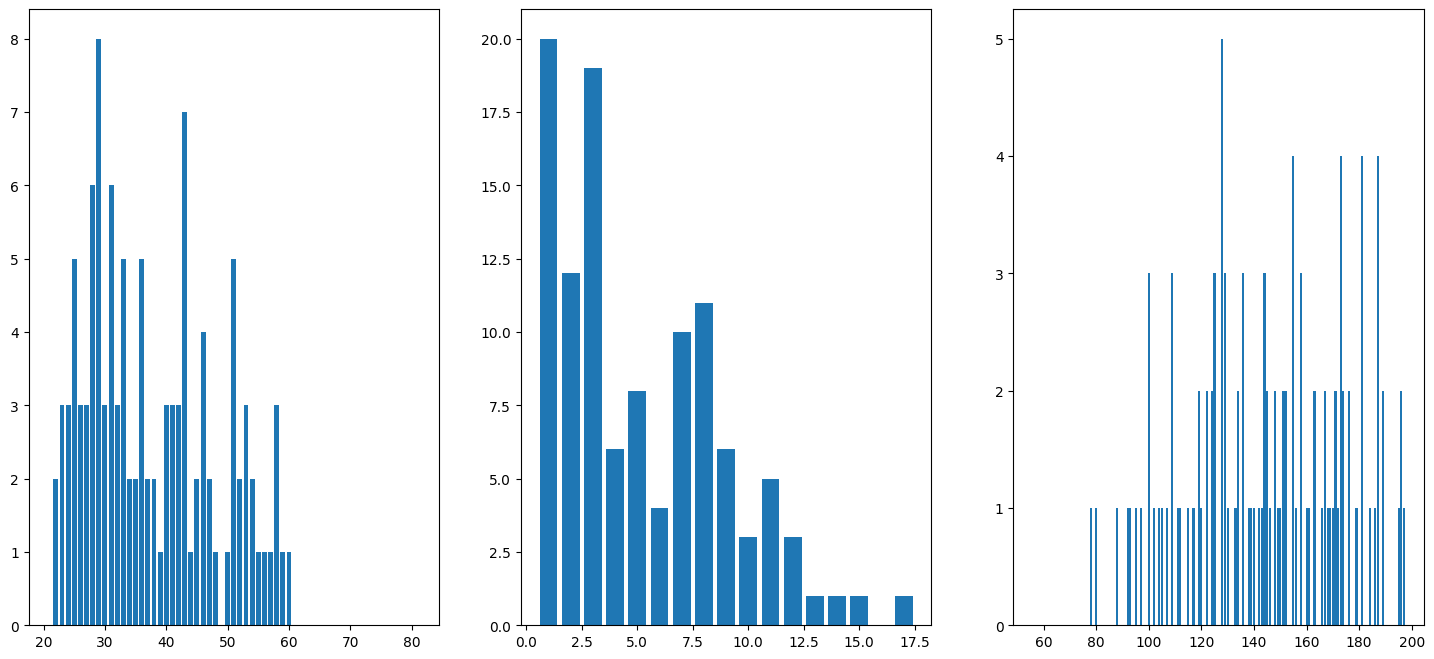

In [123]:
fig,axs=plt.subplots(1,3,figsize=(18,8))
axs[0].bar(diabetes_and_age['age'],diabetes_and_age['diabetes_patient'])
axs[1].bar(diabetes_and_pregnancies['pregnancies'],diabetes_and_pregnancies['diabetes_patient'])
axs[2].bar(glucose_and_diabetes['Glucose'],glucose_and_diabetes['daibetes_patients'])
plt.show()

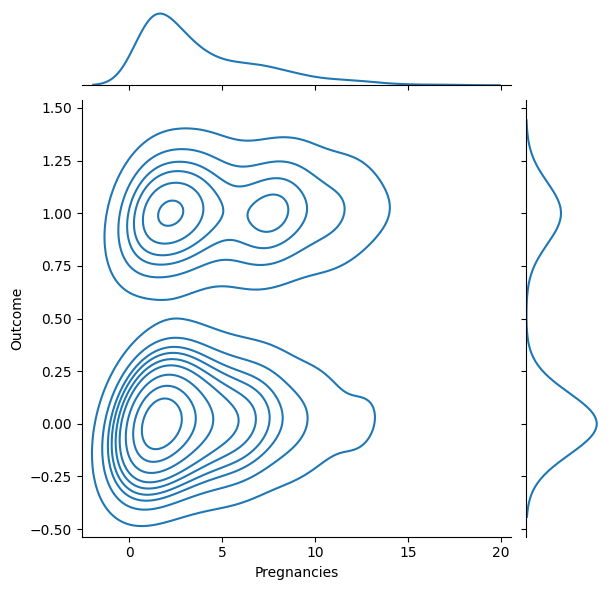

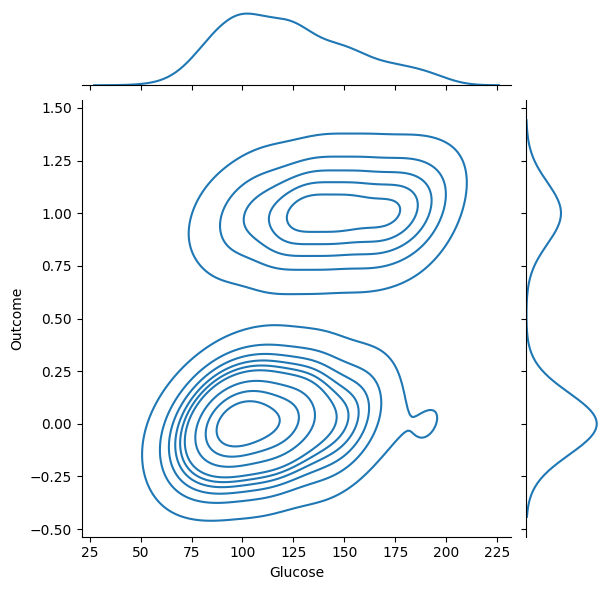

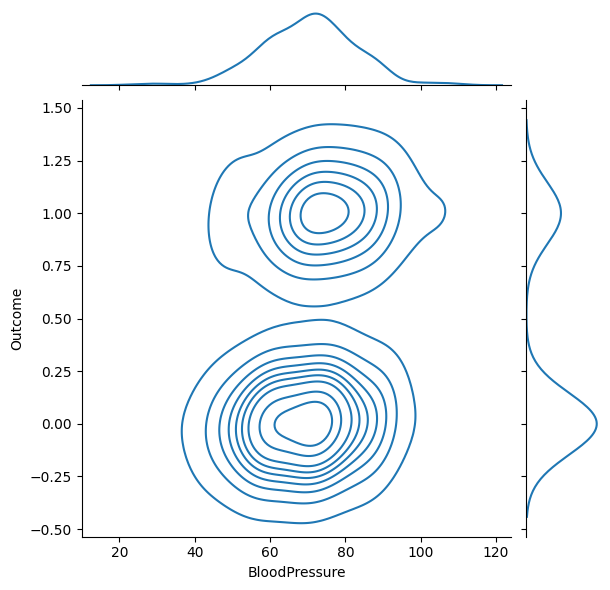

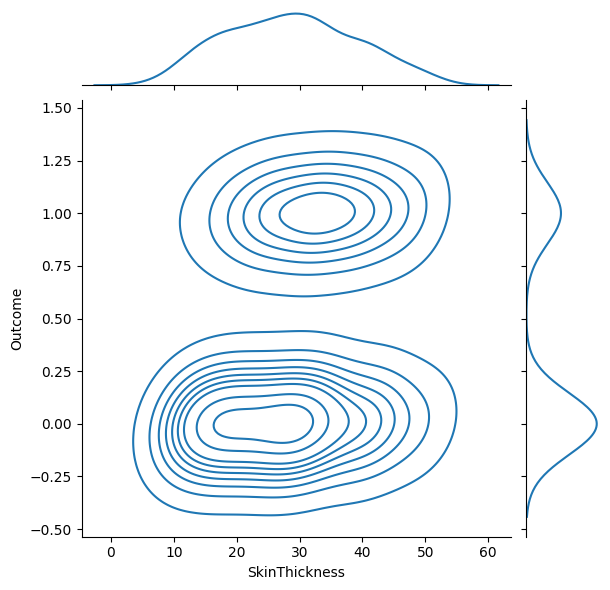

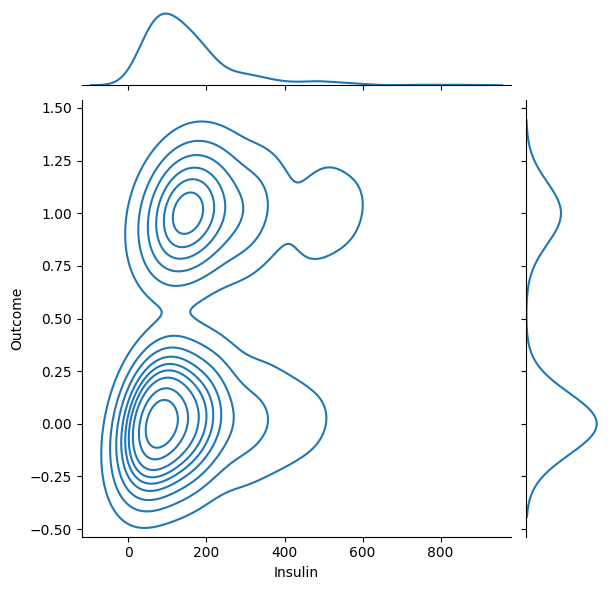

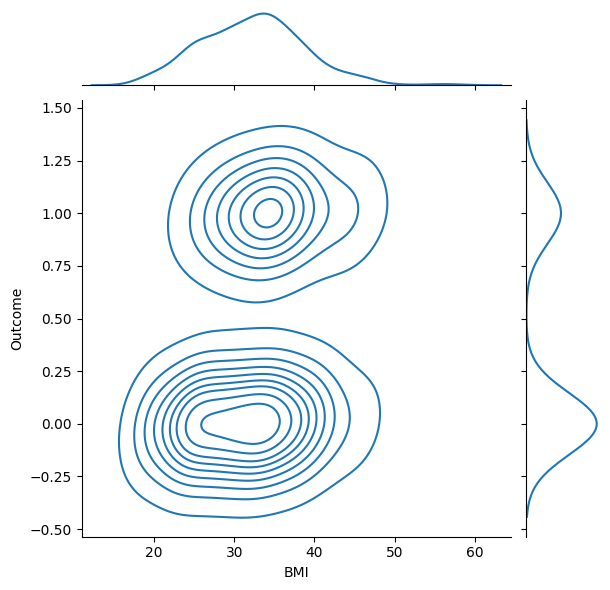

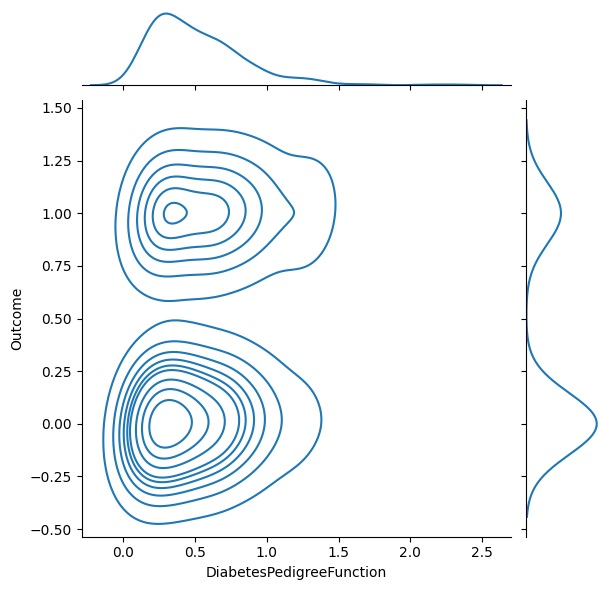

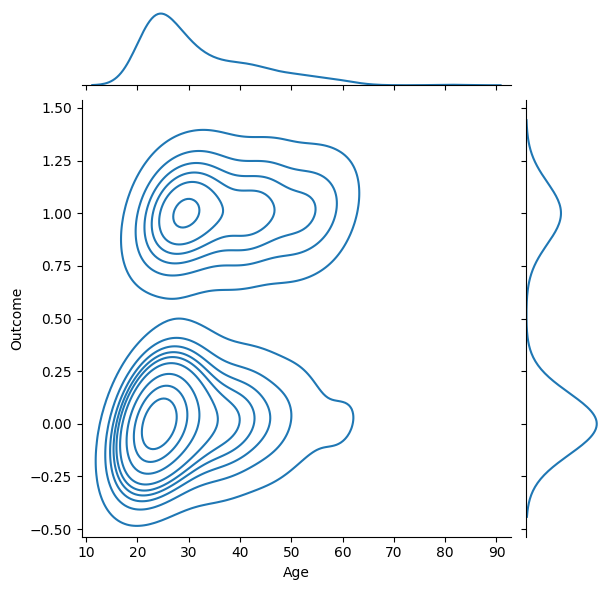

In [124]:
# prompt: generate joint plot for all

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded and preprocessed

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
  sns.jointplot(x=col, y='Outcome', data=df, kind='kde')
  plt.show()

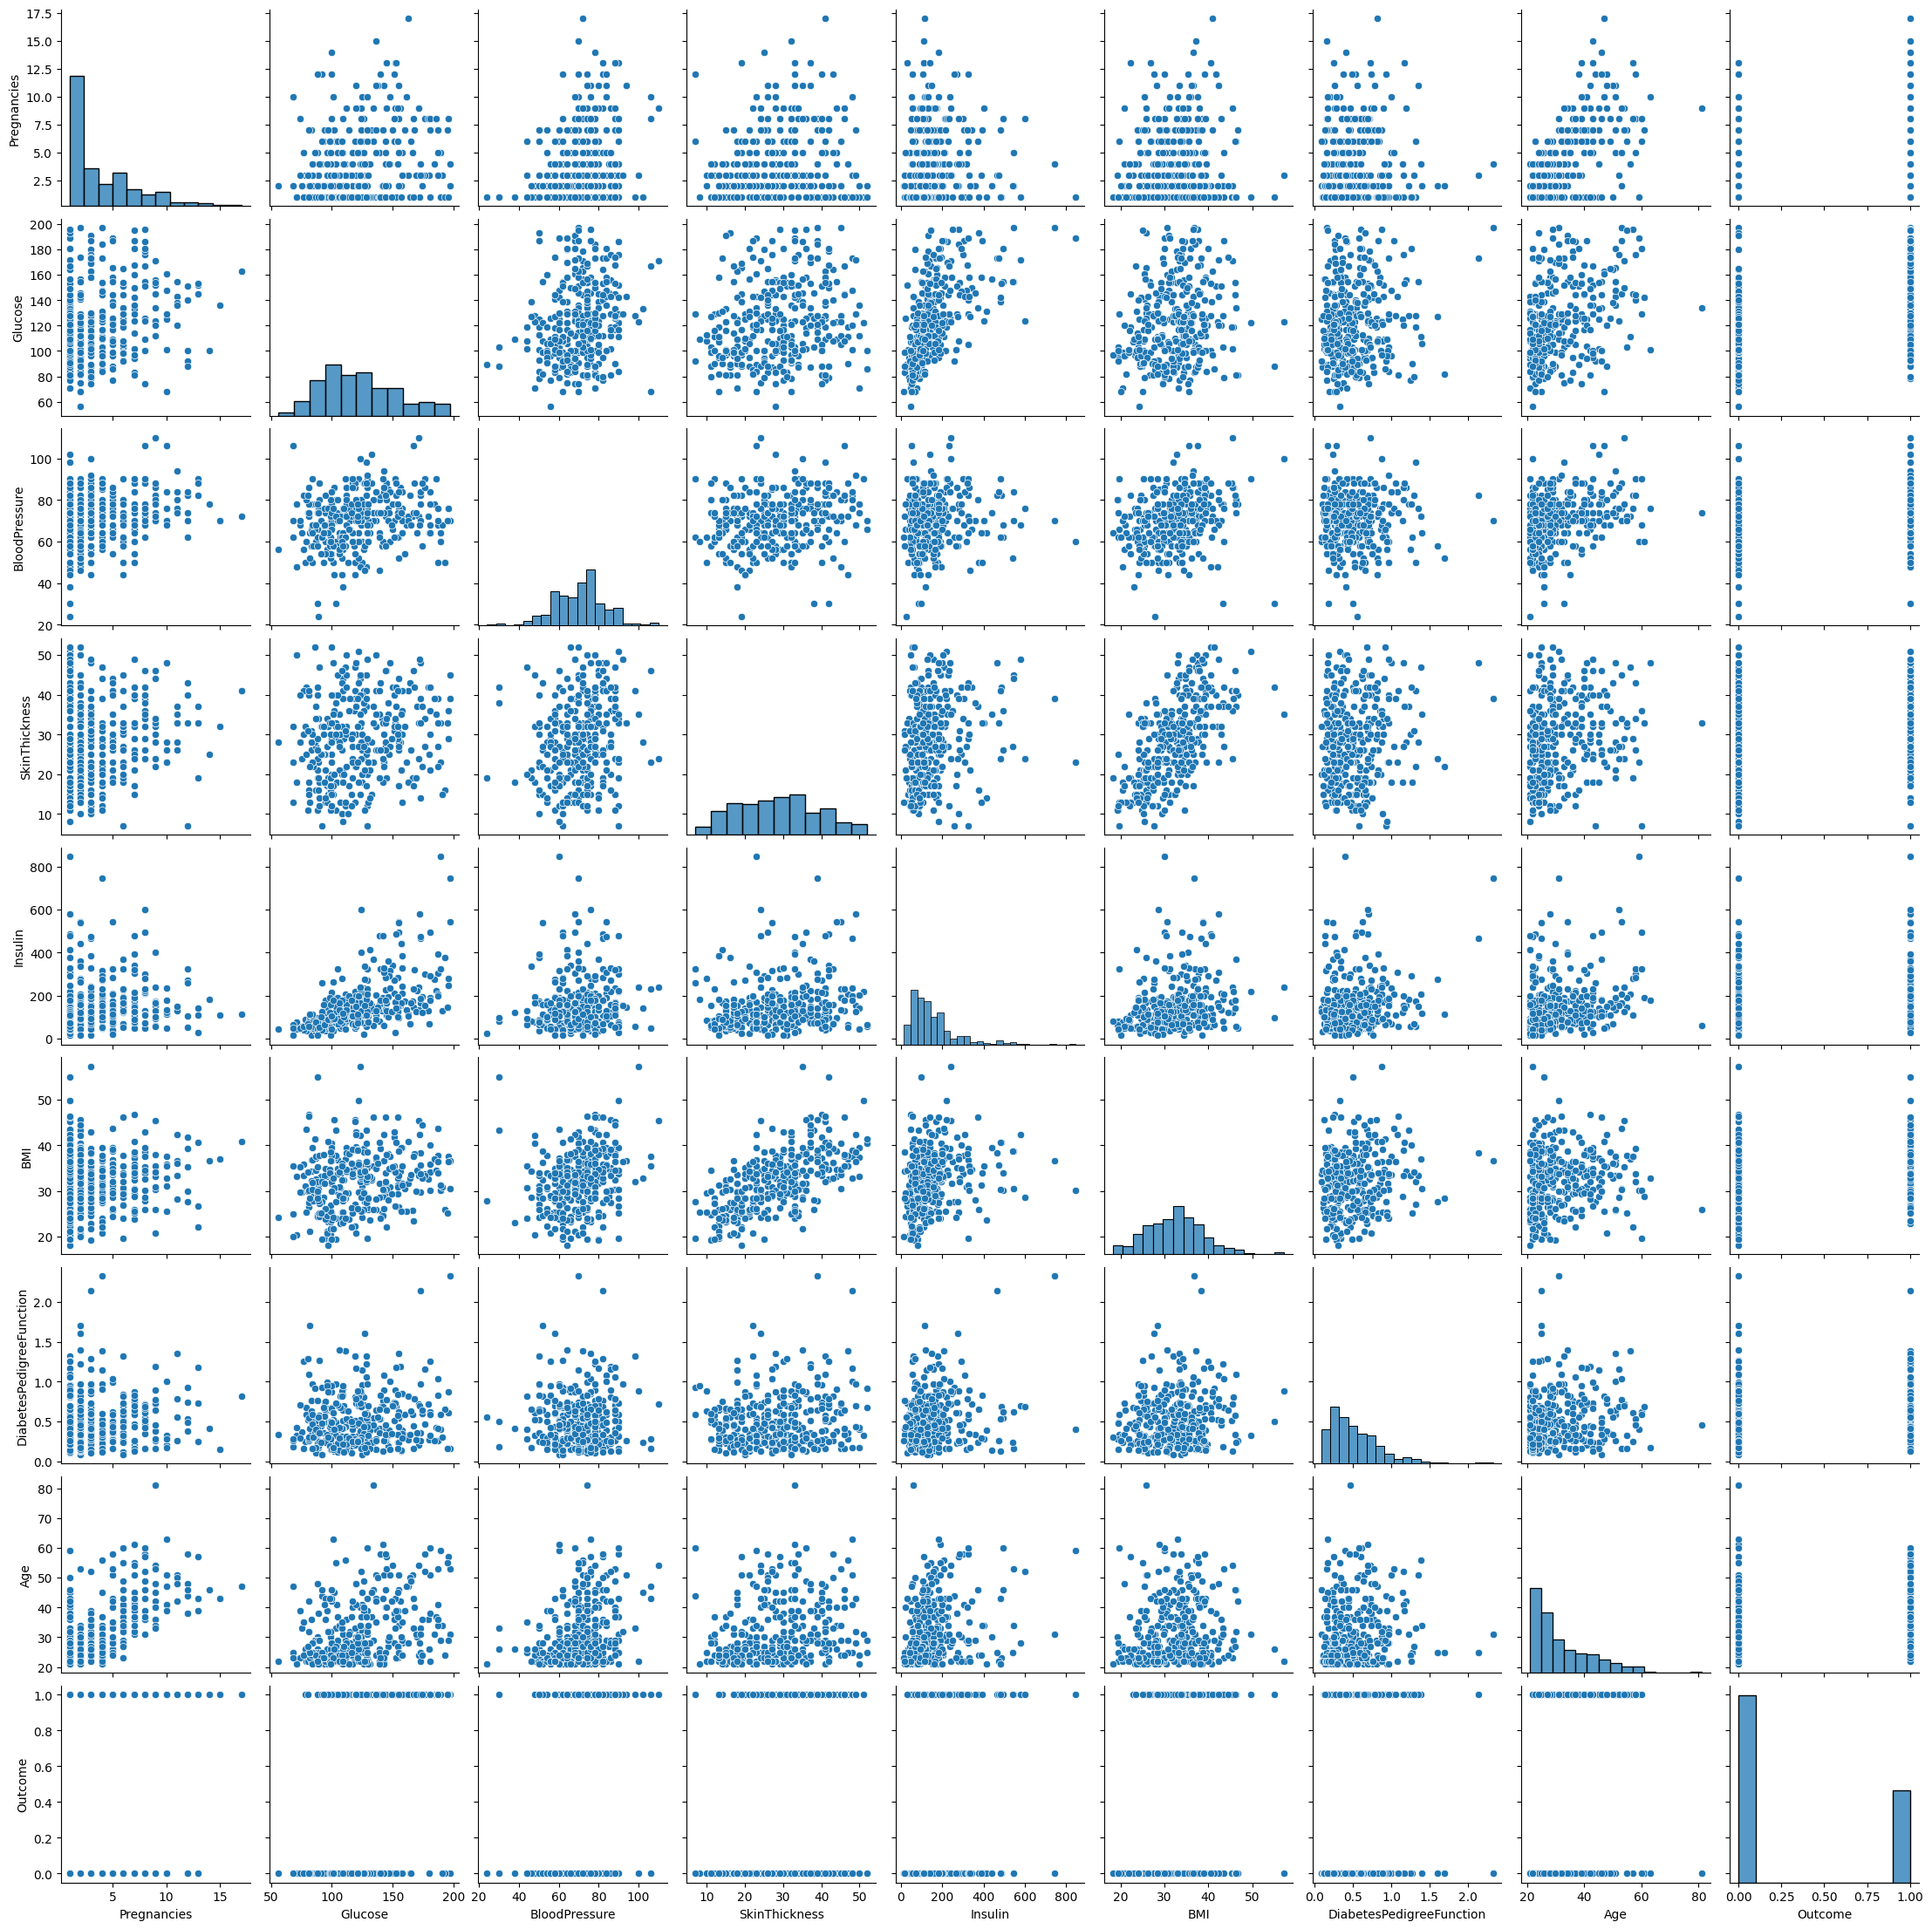

In [125]:
sns.pairplot(df)
plt.show()

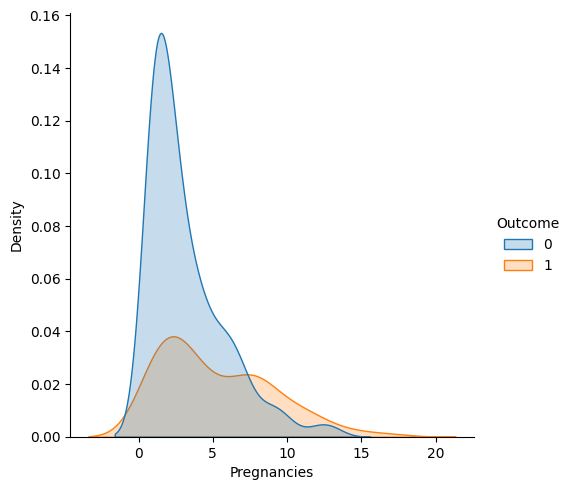

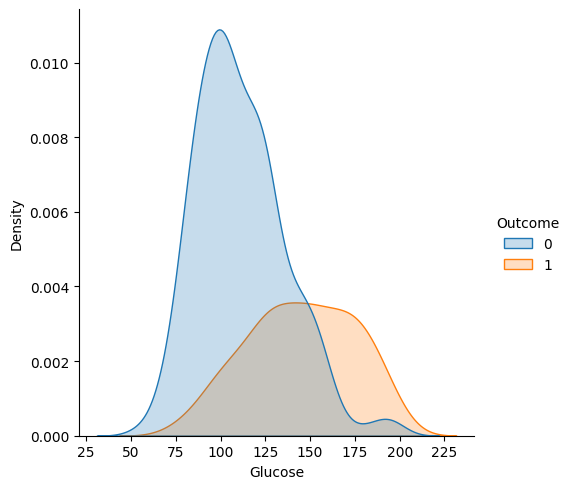

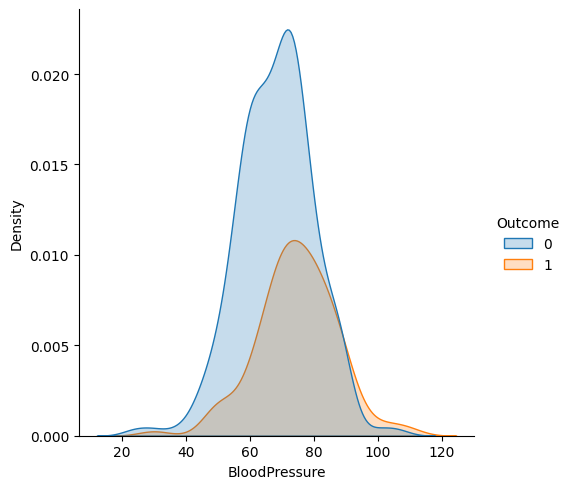

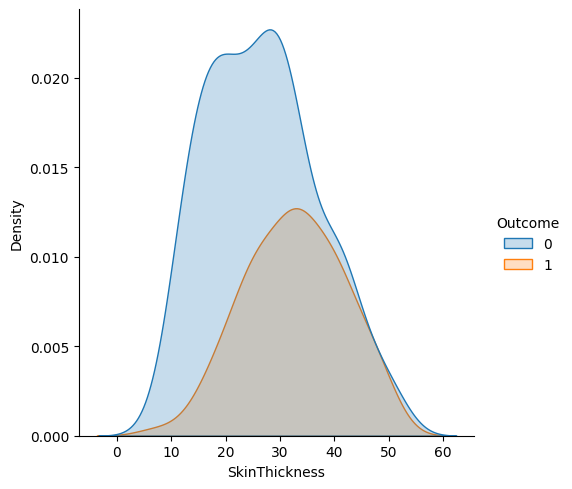

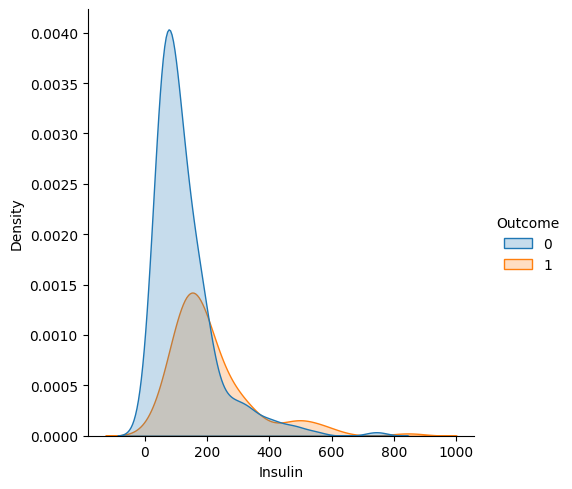

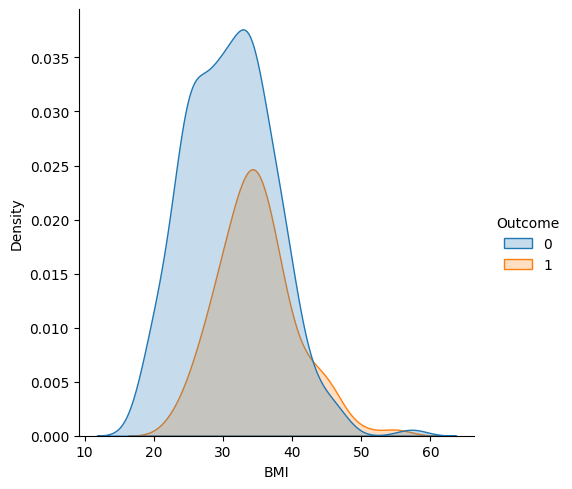

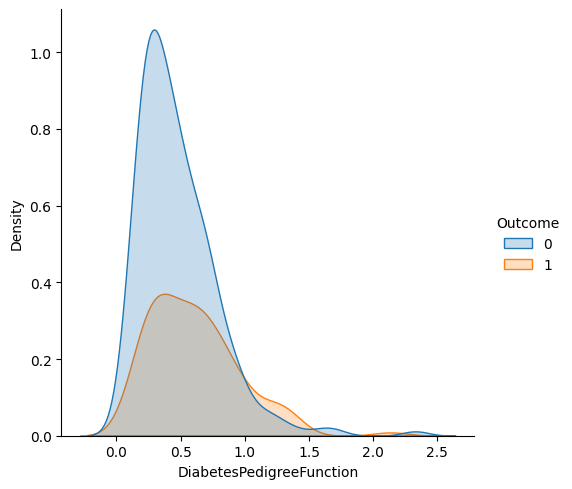

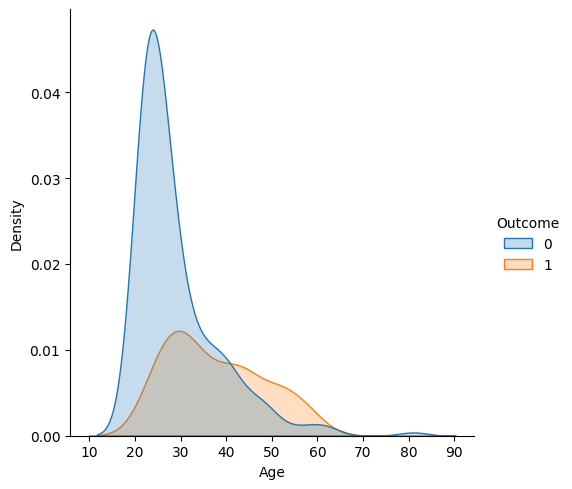

In [126]:
# prompt: distplot

# Assuming 'df' is your DataFrame and it's already loaded and preprocessed

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
  sns.displot(df, x=col, hue="Outcome", kind="kde", fill=True) # Use displot for better visualization
  plt.show()

In [127]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.250519,0.298336,0.171517,0.101397,0.118681,0.025755,0.675202,0.309008
Glucose,0.250519,1.000000,0.237707,0.204054,0.587348,0.199681,0.117859,0.375484,0.515654
BloodPressure,0.298336,0.237707,1.000000,0.208907,0.100835,0.266723,0.016021,0.343854,0.241377
SkinThickness,0.171517,0.204054,0.208907,1.000000,0.202180,0.639901,0.132766,0.205159,0.266678
Insulin,0.101397,0.587348,0.100835,0.202180,1.000000,0.246661,0.179846,0.242045,0.333050
BMI,0.118681,0.199681,0.266723,0.639901,0.246661,1.000000,0.126696,0.128185,0.278716
DiabetesPedigreeFunction,0.025755,0.117859,0.016021,0.132766,0.179846,0.126696,1.000000,0.074231,0.188130
Age,0.675202,0.375484,0.343854,0.205159,0.242045,0.128185,0.074231,1.000000,0.391538
Outcome,0.309008,0.515654,0.241377,0.266678,0.333050,0.278716,0.188130,0.391538,1.000000


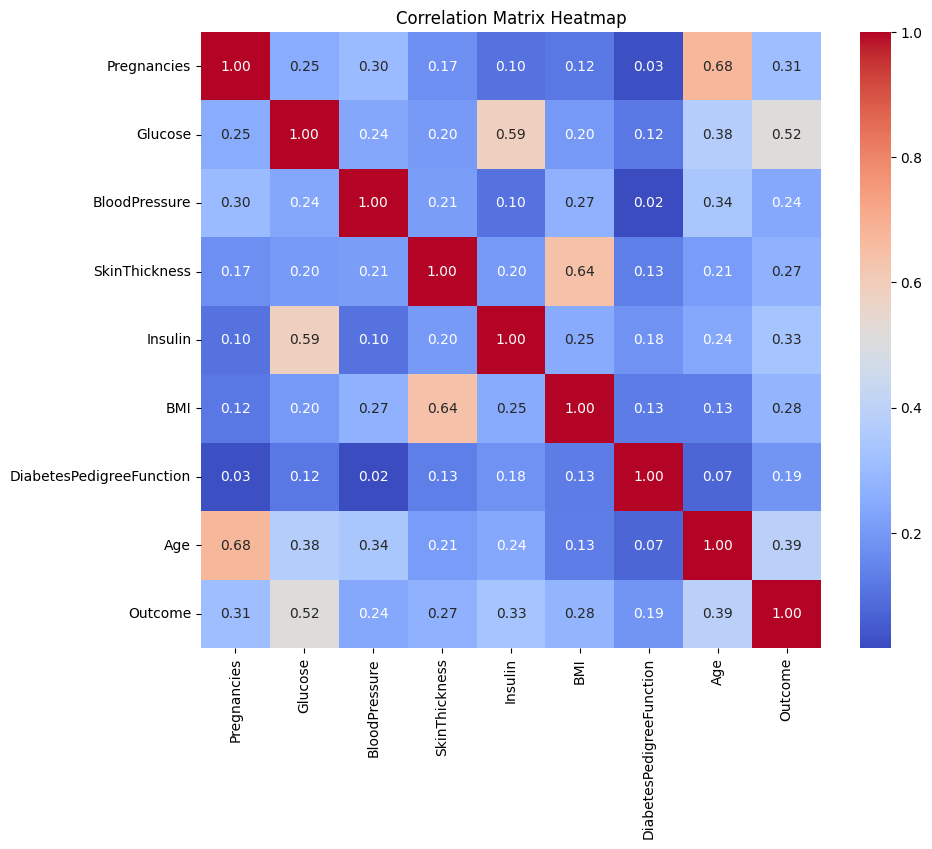

In [128]:
# prompt: pivot table with heat map
# Alternatively, you can exclude columns with incompatible data types from the correlation calculation:
numerical_cols = df.select_dtypes(include=np.number).columns  # Select only numerical columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [130]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(235, 8)
(235,)
(101, 8)
(101,)


In [132]:
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,117.0,88.0,24.0,145.0,34.5,0.403,40
1,3.0,120.0,70.0,30.0,135.0,42.9,0.452,30
2,7.0,97.0,76.0,32.0,91.0,40.9,0.871,32
3,2.0,112.0,86.0,42.0,160.0,38.4,0.246,28
4,5.0,86.0,68.0,28.0,71.0,30.2,0.364,24
...,...,...,...,...,...,...,...,...
96,1.0,122.0,64.0,32.0,156.0,35.1,0.692,30
97,4.0,197.0,70.0,39.0,744.0,36.7,2.329,31
98,4.0,148.0,60.0,27.0,318.0,30.9,0.150,29
99,4.0,116.0,72.0,12.0,87.0,22.1,0.463,37


In [133]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
669,9.0,154.0,78.0,30.0,100.0,30.9,0.164,45
110,3.0,171.0,72.0,33.0,135.0,33.3,0.199,24
458,10.0,148.0,84.0,48.0,237.0,37.6,1.001,51
486,1.0,139.0,62.0,41.0,480.0,40.7,0.536,21
520,2.0,68.0,70.0,32.0,66.0,25.0,0.187,25
...,...,...,...,...,...,...,...,...
738,2.0,99.0,60.0,17.0,160.0,36.6,0.453,21
431,3.0,89.0,74.0,16.0,85.0,30.4,0.551,38
282,7.0,133.0,88.0,15.0,155.0,32.4,0.262,37
112,1.0,89.0,76.0,34.0,37.0,31.2,0.192,23


In [134]:
y_train

,Outcome
669,0
110,1
458,1
486,0
520,0
...,...
738,0
431,0
282,0
112,0


In [135]:
# prompt: StandardScaler()

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [136]:
X_test_scaled

array([[-9.08660697e-01, -1.21896637e-01,  1.51596959e+00,
        -4.69202325e-01, -4.44694050e-02,  3.67617861e-01,
        -3.16955781e-01,  7.68657072e-01],
       [-2.85200073e-01, -2.54464361e-02,  4.01234760e-02,
         1.19387780e-01, -1.29778060e-01,  1.66023927e+00,
        -1.53707321e-01, -1.65819968e-01],
       [ 9.61721175e-01, -7.64897979e-01,  5.32072182e-01,
         3.15584482e-01, -5.05136139e-01,  1.35247227e+00,
         1.24223359e+00,  2.10754396e-02],
       [-5.96930385e-01, -2.82646973e-01,  1.35198669e+00,
         1.29656799e+00,  8.34935767e-02,  9.67763515e-01,
        -8.40017173e-01, -3.52715376e-01],
       [ 3.38260551e-01, -1.11854872e+00, -1.23859426e-01,
        -7.68089216e-02, -6.75753448e-01, -2.94081193e-01,
        -4.46888229e-01, -7.26506192e-01],
       [-9.08660697e-01, -1.05424858e+00,  6.96055084e-01,
         2.12894293e-02, -6.33099121e-01, -1.70908909e-02,
        -4.43556627e-01, -2.59267672e-01],
       [ 2.65302393e-02, -3.147970

In [137]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
669,9.0,154.0,78.0,30.0,100.0,30.9,0.164,45
110,3.0,171.0,72.0,33.0,135.0,33.3,0.199,24
458,10.0,148.0,84.0,48.0,237.0,37.6,1.001,51
486,1.0,139.0,62.0,41.0,480.0,40.7,0.536,21
520,2.0,68.0,70.0,32.0,66.0,25.0,0.187,25
...,...,...,...,...,...,...,...,...
738,2.0,99.0,60.0,17.0,160.0,36.6,0.453,21
431,3.0,89.0,74.0,16.0,85.0,30.4,0.551,38
282,7.0,133.0,88.0,15.0,155.0,32.4,0.262,37
112,1.0,89.0,76.0,34.0,37.0,31.2,0.192,23


In [138]:
from sklearn.linear_model import LinearRegression
LinReg=LinearRegression()

In [139]:
LinReg=LinReg.fit(X_train,y_train)

In [140]:
LinReg.coef_

array([2.77389963e-02, 5.94368027e-03, 9.96476962e-04, 3.82886365e-03,
       3.91989462e-04, 6.38130147e-03, 2.38441790e-01, 1.61185785e-04])

In [141]:
LinReg.intercept_

-1.0958309948176723

In [142]:
y_pred1=LinReg.predict(X_test)

In [143]:
y_pred1

array([ 0.18643414,  0.3245346 ,  0.38264187,  0.24277865,  0.04019693,
       -0.0305874 ,  0.58492503,  0.32305462,  0.42306425,  0.6013275 ,
        0.08383255,  0.85942788,  0.00642045, -0.07340993, -0.13159589,
        0.37540676,  0.34401824,  0.19620623,  0.44758487,  0.47456841,
        0.08414616,  0.35512905,  0.22054664, -0.00573718,  0.38100413,
        0.32779452,  0.63049842,  0.494575  ,  0.17903944,  0.62125051,
        0.1038842 ,  0.66244355,  0.70052698,  0.40610243,  0.33683729,
        0.51305862,  0.06438993,  0.46374792,  0.18281043,  0.46680878,
        0.44749644,  0.25502585,  0.51351466,  0.90907796,  0.47346861,
        0.12199605, -0.13153234,  0.31727011,  0.84538078,  0.44891775,
        0.79055637,  0.52024825, -0.03869038,  0.36279753,  0.11108401,
        0.7226443 , -0.04255754,  0.4960808 ,  0.1897682 , -0.10683899,
        0.6666068 ,  0.74993634,  0.33471834,  0.84385339, -0.11707815,
        0.09675009,  0.64517253, -0.10430472,  0.93610361,  0.05

In [144]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [145]:
r2_score(y_test,y_pred1)

0.13137769327298054

In [146]:

mean_absolute_error(y_test,y_pred1)

0.3646642893471205

In [147]:
mean_squared_error(y_test,y_pred1)

0.20947072586496102

In [148]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
y_pred=lg.predict(X_test)

In [150]:
y_pred.shape

(101,)

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [152]:
confusion_matrix(y_test,y_pred)

array([[52,  8],
       [24, 17]])

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6831683168316832

In [154]:

recall_score(y_test,y_pred)

0.4146341463414634

In [155]:
precision_score(y_test,y_pred)

0.68

In [156]:
from sklearn.tree import DecisionTreeRegressor
DTS= DecisionTreeRegressor()
DTS.fit(X_train, y_train)

DecisionTreeRegressor()

In [157]:
predict_3=DTS.predict(X_test)

In [158]:
accuracy_score(y_test,predict_3)

0.7029702970297029

In [159]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators = 50, max_depth=2, random_state=0)

In [160]:
Rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=0)

In [161]:
y_pred3=Rf.predict(X_test)

In [162]:
confusion_matrix(y_test,y_pred3)

array([[57,  3],
       [24, 17]])

In [163]:
accuracy_score(y_test,y_pred3)

0.7326732673267327

In [164]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred3)

0.5573770491803278

In [165]:
precision_score(y_test,y_pred3)

0.85

In [166]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()

In [167]:


NB.fit(X_train,y_train)

GaussianNB()

In [168]:
y_pred4=NB.predict(X_test)

In [169]:


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76        60
           1       0.68      0.41      0.52        41

    accuracy                           0.68       101
   macro avg       0.68      0.64      0.64       101
weighted avg       0.68      0.68      0.66       101



In [170]:
accuracy_score(y_test,y_pred4)

0.7029702970297029

In [171]:
precision_score(y_test,y_pred4)

0.6486486486486487

In [172]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [173]:
y_pred5=svm.predict(X_test)

In [174]:

accuracy_score(y_test,y_pred5)

0.6732673267326733

In [175]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 5)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [176]:
y_pred6=KNN.predict(X_test)

In [177]:
confusion_matrix(y_test,y_pred6)

array([[50, 10],
       [23, 18]])

In [178]:
accuracy_score(y_test,y_pred6)

0.6732673267326733

In [179]:
precision_score(y_test,y_pred6)

0.6428571428571429

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


In [181]:
KNN = KNeighborsClassifier()
k = range(1, 39, 2)
mat = ["eclediean", "manhattan", "minkowski"]
w = ["uniform", "distance"]

search_space = dict(n_neighbors = k, metric = mat, weights = w)

In [182]:
X_train1 = X_train[:1000]
y_train1 = y_train[:1000]

In [183]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
search = GridSearchCV(estimator=KNN, param_grid= search_space,cv = cv,  scoring = "accuracy")
search_result = search.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1140 fits failed out of a total of 3420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [184]:
search_result.best_score_

0.8372584541062803

In [185]:
search_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'}

In [186]:
knn = KNeighborsClassifier(metric ='manhattan', n_neighbors = 7, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [187]:
y_pred8 = knn.predict(X_test)
print(accuracy_score(y_test, y_pred8))

0.7128712871287128


In [191]:
# prompt: generate the web interface to using this code in gradio to take the parameters of diabetes prediction and gives the output as predicted or not

import gradio as gr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load your preprocessed data (replace with your actual data loading)
# ... (Your data loading and preprocessing code from the previous response) ...
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)


def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    input_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])
    prediction = knn.predict(input_data)
    return "Diabetic" if prediction[0] == 1 else "Not Diabetic"

iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Pregnancies"),
        gr.Number(label="Glucose"),
        gr.Number(label="BloodPressure"),
        gr.Number(label="SkinThickness"),
        gr.Number(label="Insulin"),
        gr.Number(label="BMI"),
        gr.Number(label="DiabetesPedigreeFunction"),
        gr.Number(label="Age"),
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Diabetes Prediction",
    description="Enter patient data to predict diabetes."
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a36c6e3fe38f721ca2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
